# Функции, "несписки", строки и картинки на выставку

## Рекурсия

In [1]:
def f():
    print('Hello world!')
    
    f()  # Рекурсивная: вызывает саму из себя

In [2]:
# Можно попробовать вызвать, но всё сломается,
# потому что будет "бесконечно проваливаться"

# f()

In [3]:
def f(num_times):
    # "Остановка" — конец проваливания (база рекурсии)
    # После этого начнётся "подъём" обратно
    if num_times == 0:
        return

    print('Hello world!')
    
    f(num_times - 1)  # Спуск "вглубь" — прямой ход рекурсии
    
    print('***')  # После подъёма наверх — обратный ход рекурсии 

In [4]:
f(3)

Hello world!
Hello world!
Hello world!
***
***
***


### Более осмысленный пример

[Числа Фибоначчи](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0_%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8):
$$
  \begin{aligned}
    &F_0 = 0,\ F_1 = 1\\
    &F_n = F_{n - 1} + F_{n - 2},\ n \geq 2
  \end{aligned}
$$

In [5]:
def fib(n):
    if n == 0:
        return 0

    if n == 1:
        return 1

    return fib(n - 1) + fib(n - 2)

In [6]:
fib(2)

1

In [7]:
fib(10)

55

In [8]:
fib(32)  # Уже долго. Если взять ещё больше — "конец"

2178309

### *Рекурсия с запоминанием (мемоизацией)

*Сразу так писать не надо. Если хватает "обычной" рекурсии, то и ОК.*

In [9]:
# Часть логики функции (значения базы рекурсии)
# определена "вне" функции.
# Это не очень хорошо, но что делать)
# так хотя бы должно заработать для больших чисел n.
values = [0, 1]

def fib(n):
    if n == 0 or n == 1:
        return values[n]

    if len(values) >= n + 1:
        return values[n]
    
    new_fib = fib(n - 1) + fib(n - 2)
    values.append(new_fib)  # Скорее всего, встанет на нужное место :)
    
    return new_fib

In [10]:
fib(2)

1

In [11]:
fib(10)

55

In [12]:
fib(32)  # Мгновенно

2178309

## "Несписки"

In [13]:
def is_yes(answer):
    answer = answer.strip().lower()

    return (
        answer.startswith('д')
            or answer.startswith('y')
            or answer.startswith('+')
    )

In [14]:
print('Коллекция элементов...')
print()

order = input('Упорядоченная? (да/нет)\n')
mutability = input('Изменяемая? (да/нет)\n')

is_ordered = is_yes(order)
is_mutable = is_yes(mutability)

print()

if is_ordered:
    if is_mutable:
        print('Упорядоченная, изменяемая:\n'
              'Список (list)')
    else:
        print('Упорядоченная, неизменяемая:\n'
              'Кортеж (tuple)')
else:
    if is_mutable:
        print('Неупорядоченная, изменяемая:\n'
              'Множество (set)')
    else:
        print('Неупорядоченная, неизменяемая:\n'
              '"Замороженное множество" (frozenset)')

Коллекция элементов...

Упорядоченная? (да/нет)
нет
Изменяемая? (да/нет)
да

Неупорядоченная, изменяемая:
Множество (set)


### Tuple

"Неизменяемый набор характеристик объекта"

In [15]:
# Создание

t1 = (1, 2, 3)
t2 = tuple([1, 2, 3])

print(t1)

(1, 2, 3)


In [16]:
# Обращение по индексу

t = (1, 2, 3)

print(t[0])

1


In [17]:
# Неизменяемый

t = (1, 2, 3)

t[0] = 100

TypeError: 'tuple' object does not support item assignment

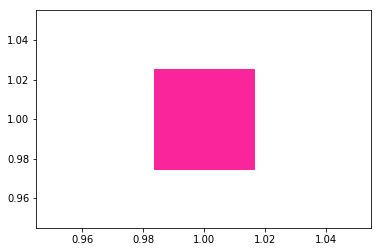

In [19]:
# Более осмысленный пример

import matplotlib.pyplot as plt

color = (250 / 255, 37 / 255, 154 / 255)

plt.plot([1], [1], marker='s', markersize=100, color=color)
plt.show()

### Set

In [20]:
# Создание

s = set([1, 2, 3])

print(s)

{1, 2, 3}


In [21]:
# Добавление

s = set([1, 2, 3])
s.add(17.5)  # "Просто" добавить, не в конец, так как нет порядка

print(s)

{1, 2, 3, 17.5}


In [22]:
# Нет порядка

s = set([1, 2, 3])

print(s[0])

TypeError: 'set' object does not support indexing

In [23]:
# Множество — коллекция уникальных элементов

s = set([1, 2, 3])

s.add(-17.5)
s.add(-17.5)
s.add(-17.5)

print(s)

{1, 2, 3, -17.5}


In [24]:
# Поиск элемента во множестве

s = set([1, 2, 3])

3 in s

True

In [25]:
# Поиск элемента во множестве работает быстрее, чем в списке
# (несмотря на то, что множество — это "неупорядоченная куча")

big_list = list()
big_set = set()

max_value = 10 ** 7

for i in range(max_value + 1):
    big_list.append(i)
    big_set.add(i)

In [26]:
num_search_times = 10 ** 2

print('Searching in list...')

for i in range(num_search_times):
    max_value in big_list

print('Finished list.')
print('Searching in set...')

for i in range(num_search_times):
    max_value in big_set

print('Finished set.')

Searching in list...
Finished list.
Searching in set...
Finished set.


## Строки

In [27]:
# Создание

s1 = 'Hello world!'
s2 = "Hello world!"

s3 = """Hello
world!"""

print(s1)

Hello world!


In [28]:
# Операции

s1 = 'Hello' + ' world!'

print(s1)

s2 = 'Hi' + 3 * '!'

print(s2)

Hello world!
Hi!!!


In [29]:
# Сравнение

print("'a' < 'b':", 'a' < 'b')       # символы "по алфавиту"
print("'aa' < 'ab':", 'aa' < 'ab')   # лексикографически, как в словаре
print("'abc' < 'ab':", 'aba' < 'ab') # если по длине больше, то и больше

# А вообще — сравниваются коды символов
print("'a' < 'A':", 'a' < 'A')
print('Код символа "a":', ord('a'))
print('Код символа "A":', ord('A'))

'a' < 'b': True
'aa' < 'ab': True
'abc' < 'ab': False
'a' < 'A': False
Код символа "a": 97
Код символа "A": 65


In [30]:
# Обращение по индексу

s = 'Hello world!'

print(s[1])

e


In [31]:
# Неизменяемость (строки — как кортежи из символов)

s = 'Hello world!'

s[1] = 'o'

TypeError: 'str' object does not support item assignment

In [32]:
# Но можно создать новую строку

s = 'HELP!'
new_s = s.replace('P', 'L')

print(s)
print(new_s)

HELP!
HELL!


<img src="./images/Help_or_Hell.jpg" width="80%">
                                            
<p style='text-align: center;'>
  <a href="https://www.deviantart.com/ebotizer/art/Help-or-Hell-Madagascar-975290417">
      <em>https://www.deviantart.com/ebotizer/art/Help-or-Hell-Madagascar-975290417</em>
  </a>
</p>

In [33]:
# Вставка значения в строку

name = 'Barbie'
look = 'beautiful'
month = 'September'
day = 24

print(
    'Hi,' + ' ' + name + '! ' + 'It\'s the morning of ' + month + ' ' + str(day) + ', and you look ' + look + '!'
)
print(
    'Hi, {}! It\'s the morning of {} {}, and you look {}!'.format(name, month, day, look)
)
print(
    f'Hi, {name}! It\'s the morning of {month} {day}, and you look {look}!'
)

Hi, Barbie! It's the morning of September 24, and you look beautiful!
Hi, Barbie! It's the morning of September 24, and you look beautiful!
Hi, Barbie! It's the morning of September 24, and you look beautiful!


In [34]:
# Строка — не просто набор символов

s = 'Hello world!'

print('upper:', s.upper())
print('lower:', s.lower())

upper: HELLO WORLD!
lower: hello world!


In [35]:
s = 'Hello world!'
words = s.split()

print('split:', words)

split: ['Hello', 'world!']


In [36]:
s = 'Hello   \n\n\n   world!'
words = s.split()

print('split:', words)

split: ['Hello', 'world!']


In [37]:
s = 'Hello.world!'
words = s.split('.')

print('split:', words)

split: ['Hello', 'world!']


In [38]:
# "Антипод" split-а

words = ['Hello', 'world!']
s = ' '.join(words)

print(s)

Hello world!


In [42]:
words = ['Hello', 'world!']
s = '_'.join(words)

print(s)

Hello_world!
